###### Project: Wrangling and Analyze Data

## Data Gathering
In this first section, I will be gathering three pieces of data using different methods for this project and I load them into the notebook.
1. Directly acessing the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Imports to be used in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests as rq
import os
import json

In [2]:
tweetDF = pd.read_csv("twitter-archive-enhanced.csv")
tweetDF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = rq.get(url)
with open ("image_predictions.tsv", "wb") as file:
    file.write(response.content)

predictDF = pd.read_csv("image_predictions.tsv", sep='\t')
predictDF.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweetDF.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
end = timer()

In [5]:
#printing the first tweet in the json file
with open("tweet-json.txt", 'r') as f:
    print(f.readline())

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [6]:
#This code cell will take the json text file and return the necessary data for each tweet and store it
df_list = []
#Loop will read every tweet and stores its information in a list
with open("tweet-json.txt", "r") as f:
    for line in f:
        #json.loads will decode the string
        tweet = json.loads(line)
        #this will append the info of the tweet depnding on its location in the tweet json
        df_list.append({'tweet_id': tweet['id'],
                        'retweets': tweet['retweet_count'],
                        'favorites': tweet['favorite_count']})
df_list[0]

{'tweet_id': 892420643555336193, 'retweets': 8853, 'favorites': 39467}

In [7]:
#Converting the list to a pandas dataframe
ratingDF = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
ratingDF.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, I will detect and document the quality issues and tidiness issue. I will be using both visual assessments and
programmatic assessements to assess the data.

**Note from Udacity:** 
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.



### Visual Assestment
In this sub-section, I will visually assess the dataframes by looking through them to see which issues, quality or tidiness, I can find

In [8]:
tweetDF

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Here for the tweetDF I saw that the html tag was still present for the source column. I also saw that some names areincorrect and that some seem ratings seem to be incorrect as well

In [9]:
predictDF

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
ratingDF

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Visual Quality issues
1. There seems to be an issue with the dog names in tweetDF where they are named incorrectly, in tweet (887517139158093824) the dog is named "such", the dog in tweet (666411507551481857) is named "quite" and I can see that there are many dogs named "a", "an" or "the".

2. Some dogs in tweetDF have incorrect ratings, for example the dog in the tweet (666287406224695296) has a rating of 1/2, the 1/2 in the tweet is not refering to his rating.

3. Values in the Source column in tweetDF all have their HTML tag, it is unnecessary and makes them harder to read


### Visual Tidiness issues
1. There doesnt seem to be a need for both the rating_numerator and rating_denominator columns, especially if the denominator is always supposed to be 10.

2. The last four columns in tweetDF store the dogs 'stages', unless a dog can have more than one these types, they should be combined to one column

### Programmatic Assestment
In this sub-section, I will programmatically assess the dataframes to see which issues, quality or tidiness, I can find.

In [11]:
tweetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tweetDF[tweetDF['expanded_urls'].isnull()].count()

tweet_id                      59
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     59
source                        59
text                          59
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                  0
rating_numerator              59
rating_denominator            59
name                          59
doggo                         59
floofer                       59
pupper                        59
puppo                         59
dtype: int64

In [13]:
tweetDF.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#The line below trys to find all the names where the first charecter is lowercase, likely not being a real name
possible_incorrect_names = tweetDF['name'].apply(lambda x : x if x[0].islower() else np.nan).dropna()
print(possible_incorrect_names.value_counts().sum())
possible_incorrect_names.value_counts()

109


a               55
the              8
an               7
very             5
quite            4
one              4
just             4
actually         2
not              2
mad              2
getting          2
infuriating      1
officially       1
by               1
life             1
all              1
light            1
his              1
such             1
my               1
unacceptable     1
incredibly       1
space            1
old              1
this             1
Name: name, dtype: int64

In [15]:
tweetDF.duplicated().sum()

0

In [16]:
#Tweets could be duplicated but just their tweet ID changed, this will check for that
tweetDF.set_index('tweet_id').duplicated().sum()

0

In [17]:
#Finds the tweets where the rating_numerator is greater than or equal to 20
tweetDF[tweetDF['rating_numerator'].apply(lambda x: x >= 20)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [18]:
#Finds the tweets where the rating_denominator is less then 10, their ratings and urls where printed
tempDF = tweetDF[tweetDF['rating_denominator'].apply(lambda x: x < 10)]
print(tempDF.rating_denominator)
print(tempDF.expanded_urls.values)

313     0
516     7
2335    2
Name: rating_denominator, dtype: int64
[nan
 'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1'
 'https://twitter.com/dog_rates/status/666287406224695296/photo/1']


In [19]:
#The tweets where the rating_denominator is greater than 10
tweetDF[tweetDF['rating_denominator'].apply(lambda x: x > 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [20]:
#I saw two tweets that looked identical, they were querried here
tweetDF.query('tweet_id == 775096608509886464 or tweet_id == 740373189193256964')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


It seems that retweets are duplicates and should be removed

In [21]:
#Checking how many tweets are retweets
tweetDF['retweeted_status_id'].count()

181

In [22]:
#Checking how many tweets are replies
tweetDF['in_reply_to_status_id'].count()

78

In [23]:
tweetDF['in_reply_to_user_id'].count()

78

In [24]:
#Percentage of tweets that are replies
tweetDF['in_reply_to_user_id'].count() / tweetDF['tweet_id'].count()

0.033106960950764007

In [25]:
predictDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
predictDF.duplicated().sum()

0

In [27]:
#Checking for duplicated rows ignoring tweet_id
tempDF = predictDF.set_index('tweet_id')
print(tempDF[tempDF.duplicated()]['jpg_url'].count())
tempDF[tempDF.duplicated()]

66


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True


In [28]:
#Checking if an image is in the df more than once
predictDF.query('jpg_url == "https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [29]:
ratingDF.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [30]:
ratingDF['tweet_id'].duplicated().sum()

0

### Quality issues
1. There are 59 tweets with NaN values for `expanded_urls`, therefor not having hyperlinks, images, in the tweet.

1. The dog types and names columns have "None" string but instead should have NaN literal.

1. There are 109 incorrectly named dogs with 25 different names such as "officially", "actually" and "infuriating".

1. `timestamp` column in tweetDF is a string object, should be converted to datetime instead.

1. Values in the `source` column in the tweetDF all have their HTML tag, it is unnecessary.

1. There are 25 dog ratings which had a number greater than 20 on the `rating_numerator`, such as (749981277374128128) with a numerator of 1776, these are outliers and should be removed.

1. There are 3 tweets with `rating_denominator` less than 10, (835246439529840640) does not have a url, (810984652412424192) does not have a rating in the original tweet, and (666287406224695296) rating should be changed from 1/2 to 9/10.

1. There are 20 tweets with `rating_denominator` more than 10, (716439118184652801) is rated 50/50 but is actually rated 11/10. (740373189193256964) is rated 9/11 but should be changed to 14/10. (722974582966214656) is rated 4/20 but should be changed to 13/10. (820690176645140481) is rated 84/70, inspecting the images I can see that there are 7 identical sibling dogs. (758467244762497024) and (709198395643068416) are rated 165/150 and 45/50 respectively, inspecting the images I see that the tweets have many dogs and their ratings are combined, it is impossible to tell how the ratings divide, they and the remaining tweets can be removed.

1. Tweet (775096608509886464) is a retweet of tweet (740373189193256964) and is identical to it, it has the same images and rating, retweets are redudant and should be removed, there are a total of 181 retweets.

1. There are 66 duplicated rows, in the predictDF.

### Tidiness issues
1. There doesnt seem to be a need for both the  rating_numerator and rating_denominator columns, especially if the denominator is supposed to be 10.

2. The last four columns in tweetDF store the dogs 'stages', unless a dog can have more than one these types, they should be combined to one column

3. Only 3.3% of the tweets are replies, leaving the rest of the tweets with many null values in `in_reply_to_user_id` and `in_reply_to_status_id`, knowing the tweet is a reply doesn't tell us much and the two columns can be removed

## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing. If I find any more issues while cleaning, I will also clean the new issues. 

In [31]:
# Make copies of original pieces of data, this is to make sure that the original data is not changed in case anything goes wrong
df1 = tweetDF.copy()
df2 = predictDF.copy()
df3 = ratingDF.copy()

Tidines Issues should be cleaned first, but I will be doing them last because of the issues in the denominaotr and numerator

### Quality Issue #1:

#### Define
Remove tweets with missing `expanded_urls`

#### Code

In [32]:
df1 = df1[df1['expanded_urls'].notna()]

#### Test

In [33]:
df1[df1['expanded_urls'].isnull()]['tweet_id'].count()

0

### Quality Issue #2:

#### Define
Replace "None" values with NaN in the `name` column and in the dog types columns

#### Code

In [34]:
df1['name'].replace("None", np.nan, inplace = True)
df1['doggo'].replace("None", np.nan, inplace = True)
df1['floofer'].replace("None", np.nan, inplace = True)
df1['pupper'].replace("None", np.nan, inplace = True)
df1['puppo'].replace("None", np.nan, inplace = True)

#### Test

In [35]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


### Quality Issue #3:

#### Define
Replace incorrectly named dogs in the tweetDF with NaN

#### Code

In [36]:
incorrect_names = ['a', 'the', 'an', 'very', 'quite', 'one', 'just', 'actually', 'getting',
                   'mad', 'not', 'officially', 'by', 'his', 'infuriating','this', 'all',
                   'my', 'space', 'life', 'light', 'such', 'old', 'incredibly', 'unacceptable'];
df1['name'] = df1['name'].replace(incorrect_names, np.nan)

#### Test

In [37]:
df1['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326         NaN
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

In [38]:
#if this returns an empty series, then the incorrect names were removed
df1['name'].apply(lambda x : x if x in incorrect_names else np.nan).dropna()

Series([], Name: name, dtype: float64)

In [39]:
#Query a few of the name just to test again that the names were removed
df1.query('name == "a" or name == "the" or name == "officially"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #4:

#### Define
Convert `timestamp` column's datatype to datetime

#### Code

In [40]:
df1["timestamp"] = pd.to_datetime(df1["timestamp"])

#### Test

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          1502 non-null object
doggo                         94 non-null object
floofer                       10 non-null object
pupper                        255 non-null object
puppo                         29 non-null object
dtypes: datetime64[ns](1), floa

### Quality Issue #5:

#### Define
Remove html tag from values in the `source` column

#### Code

In [42]:
#This splits the string in source by looking for and splitting at the first '>' charecter,
# and then removing the '</a>' at the end
df1['source'] = df1['source'].apply(lambda x: x.split('>')[1][:-3])

#### Test

In [43]:
df1['source'].sample(30)

82       Twitter for iPhone
1395     Twitter for iPhone
2349     Twitter for iPhone
909      Twitter for iPhone
2073     Twitter for iPhone
1475     Twitter for iPhone
528      Twitter for iPhone
2117     Twitter for iPhone
2054     Twitter for iPhone
226      Twitter for iPhone
1863     Twitter for iPhone
2224     Twitter for iPhone
2029     Twitter for iPhone
879      Twitter for iPhone
384      Twitter for iPhone
1760    Vine - Make a Scene
1901     Twitter for iPhone
2121     Twitter for iPhone
1249     Twitter for iPhone
1995     Twitter for iPhone
100      Twitter for iPhone
1386     Twitter for iPhone
2294     Twitter for iPhone
1924     Twitter for iPhone
1161     Twitter for iPhone
2354     Twitter for iPhone
2166     Twitter for iPhone
855      Twitter for iPhone
133      Twitter for iPhone
1056     Twitter for iPhone
Name: source, dtype: object

### Quality Issue #6:

#### Define
Remove tweets with numerator ratings greater or equal to 20

#### Code

In [44]:
#in the rating_numerator column, if a value is not less than 20, convert it to NaN
df1['rating_numerator'] = df1['rating_numerator'].apply(lambda x: int(x) if x<20 else np.nan)
#Removes rows with NaN value in numerator from df1
df1.dropna(subset=['rating_numerator'], inplace = True)

#### Test

In [45]:
df1[df1['rating_numerator'].apply(lambda x: x >= 20)]["tweet_id"].count()

0

### Quality Issue #7:

#### Define
Fix the rating of the tweets with under 10 in denominator, there are 3, two of which were removed in the previous cleaning steps, only leaving (666287406224695296) whose rating will be changed from 1/2 to 9/10

#### Code

In [46]:
df1.loc[df1["tweet_id"]==666287406224695296, "rating_numerator"] = 9
df1.loc[df1["tweet_id"]==666287406224695296, "rating_denominator"] = 10

#### Test

In [47]:
df1.query('tweet_id == 666287406224695296')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9.0,10,NaN,NaN,NaN,NaN,NaN


### Quality Issue #8:

#### Define
Change and correct the incorrectly rated tweets with more than 10 on their denominator. Change (716439118184652801) to 11/10. Change (740373189193256964) to 14/10. Change (722974582966214656) to 13/10. (820690176645140481)'s original rating of 84/70 will be divided by 7 to be 12/10. The rest of the dogs with a denominator greater than 10 will be removed.

#### Code

In [48]:
df1.loc[df1["tweet_id"]==716439118184652801, "rating_numerator"] = 11
df1.loc[df1["tweet_id"]==716439118184652801, "rating_denominator"] = 10

df1.loc[df1["tweet_id"]==740373189193256964, "rating_numerator"] = 14
df1.loc[df1["tweet_id"]==740373189193256964, "rating_denominator"] = 10

df1.loc[df1["tweet_id"]==722974582966214656, "rating_numerator"] = 13
df1.loc[df1["tweet_id"]==722974582966214656, "rating_denominator"] = 10

df1.loc[df1["tweet_id"]==820690176645140481, "rating_numerator"] = int(84/7)
df1.loc[df1["tweet_id"]==820690176645140481, "rating_denominator"] = int(70/7)

#in the rating_denominator column, if a value is not less or equal to 10, convert it to NaN
df1['rating_denominator'] = df1['rating_denominator'].apply(lambda x: int(x) if x<=10 else np.nan)
#Removes rows with NaN value in denominator from df1
df1.dropna(subset=['rating_denominator'], inplace = True)

#### Test

In [49]:
df1[df1['rating_denominator'].apply(lambda x: x > 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #9:

#### Define
Removing retweets, rows with non-null values in `retweeted_status_id`, from df1

#### Code

In [50]:
#The line of code below concatenates df1 to a subset of df1 where retweeted is not null, then dropping all duplicates
df1 = pd.concat([df1, df1[df1["retweeted_status_id"].notnull()]]).drop_duplicates(keep=False)

#### Test

In [51]:
df1['retweeted_status_id'].count()

0

### Tidiness Issue #0.5:

#### Define
By removing the retweets in the df, the `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are now effectively useless and should be removed.

#### Code

In [52]:
df1.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1, inplace = True)

#### Test

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2097 non-null datetime64[ns]
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2097 non-null object
rating_numerator         2097 non-null float64
rating_denominator       2097 non-null float64
name                     1385 non-null object
doggo                    84 non-null object
floofer                  10 non-null object
pupper                   231 non-null object
puppo                    24 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 245.7+ KB


### Quality Issue #10:

#### Define
Remove the duplicated rows in df2 (predictDF) 

#### Code

In [54]:
#Concatenating df2 to a subset of df2 where jpg_url is duplicated, but dropping duplicates
df2 = pd.concat([df2, df2[df2["jpg_url"].duplicated()]]).drop_duplicates(keep=False)

#### Test

In [55]:
df2[df2["jpg_url"].duplicated()]["tweet_id"].count()

0

### Tidiness Issue #1:

#### Define:
Removing denominator column from df1 and also renanming numerator to something more appropriate / descriptive 

#### Code

In [56]:
#Dropping rating_denominator column
df1.drop("rating_denominator", axis = 1, inplace = True)
#Renaming rating_numerator to rating_out_of_10
df1.rename(columns={"rating_numerator": "rating_out_of_10"}, inplace = True)
#Converting to int rating_out_of_10 to int
df1["rating_out_of_10"] = df1["rating_out_of_10"].astype(int)

#### Test

In [57]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,NaN,NaN,NaN


### Tidiness Issue #2:

#### Define
Concatenating the `doggo`, `floofer`, `pupper`, and `puppo` columns in df1 to a new column `dog_type` and then removing the old columns.

#### Code

In [58]:
#Since strings cannot be concatenated with NaN, NaN in the dog types will be replaced with an empty string ""
df1["doggo"] = df1["doggo"].fillna("")
df1["floofer"] = df1["floofer"].fillna("")
df1["pupper"] = df1["pupper"].fillna("")
df1["puppo"] = df1["puppo"].fillna("")
#Concatenating the dog types in a new column named "dog_type"
df1["dog_type"] = df1["doggo"] + df1["floofer"] + df1["pupper"] + df1["puppo"]
#Removing the old columns
df1.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace = True)

#### Test

In [59]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,NaN,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo


### Quality Issue 10.5:

#### Define
After concatinating the dog type columns, there might be some rows with more the one type in the same column. Those rows will be removed as a dog cannot have more than one type. sadly, a puppo cannot be a floofer.

In [60]:
df1["dog_type"].value_counts()

                1760
pupper           221
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

#### Code

In [61]:
#Convert dop_type values to nan if they are not less than or equal to a length of 7
df1["dog_type"] = df1["dog_type"].apply(lambda x: x if len(x) <= 7 else np.nan)
#Remove rows with NaN in dog_type column
df1.dropna(subset=['dog_type'], inplace = True)
#Replacing empty strings with np.nan
df1["dog_type"] = df1["dog_type"].apply(lambda x: x if len(x) > 1 else np.nan)

#### Test

In [62]:
df1["dog_type"].value_counts()

pupper     221
doggo       72
puppo       23
floofer      9
Name: dog_type, dtype: int64

### Tidiness Issue #3:

#### Define
Removing the `in_reply_to_user_id` and `in_reply_to_status_id` columns from df1

#### Code

In [63]:
#Removing the columns
df1.drop(["in_reply_to_user_id", "in_reply_to_status_id"], axis = 1, inplace = True)

#### Test

In [64]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN


## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
#Merging df1 to df2, then merging them to df3
twitter_archive_master = df1.merge(df2, on="tweet_id").merge(df3, on="tweet_id")
#Coverting the master df to a CSV file
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,dog_type,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467


## Analyzing and Visualizing Data
In this section, I will analyze and visualize the wrangled data to produce insights and visualizations about the tweets.

1: What is the average rating from the tweets?

In [66]:
twitter_archive_master["rating_out_of_10"].mean()

10.547631176770249

2: How many dogs are in each dog type?

In [67]:
twitter_archive_master["dog_type"].value_counts()

pupper     202
doggo       63
puppo       22
floofer      7
Name: dog_type, dtype: int64

3: What are the most common names for dogs?

In [68]:
twitter_archive_master["name"].value_counts().head(10)

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Toby        7
Daisy       7
Name: name, dtype: int64

4: How popular are the tweets?

In [69]:
print("Average favorite count: " + str(int(twitter_archive_master["favorites"].mean())))
print("Average retweet count: " + str(int(twitter_archive_master["retweets"].mean())))

print("Highest favorite count: " + str(int(twitter_archive_master["favorites"].max())))
print("Hihgest retweet count: " + str(int(twitter_archive_master["retweets"].max())))

Average favorite count: 8880
Average retweet count: 2754
Highest favorite count: 132810
Hihgest retweet count: 79515


5: By which devices are the tweets tweeted from?

In [70]:
twitter_archive_master["source"].value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Insights:
1. The average rating out of the dogs from the tweets is 10.5 out of 10.

2. The most **puppo**lar dog type is pupper with a total of 202 dogs, followed by doggo with 63, then puppo at  only 22, and finally, the cutest but least **puppo**lar is floofer with only 7 dogs out of 1963 dogs.

3. The most common dog names are Charlie, Oliver, Cooper, Lucy, Tucker and Penny.

4. The tweets on average get 8880 favorites and 2754 retweets and the most retweeted tweet got 132810, the tweet that was favorited the most had 79515

5. The tweets are almost always sent from an iPhone, with 1925 tweets being from an iPhone, 28 from a computer, and 10 from TweetDeck, which is mostly used on computers.

### Visualizations

#### Bar plot of the total number of ratings from all the tweets

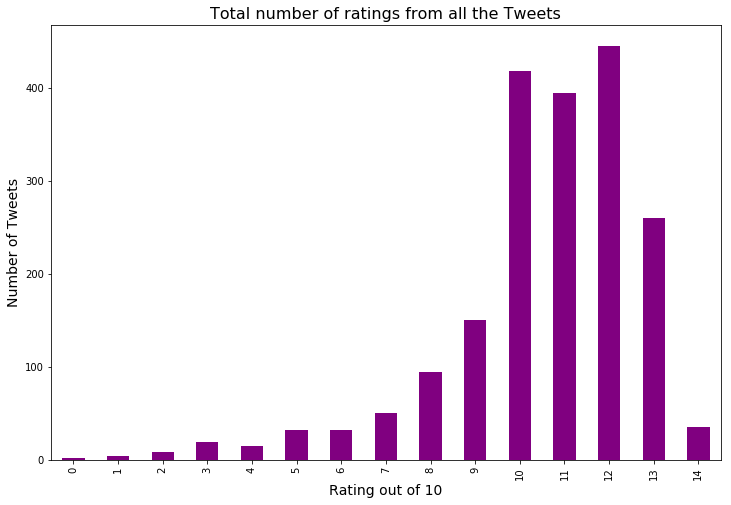

In [71]:
#Get count of each rating and then sort them by index, instead of count
average_ratings = twitter_archive_master["rating_out_of_10"].value_counts().sort_index()
#Plotting
average_ratings.plot(kind="bar", color = "purple", figsize = (12,8));
plt.xlabel("Rating out of 10", fontsize = 14)
plt.ylabel("Number of Tweets", fontsize = 14)
plt.title("Total number of ratings from all the Tweets", fontsize = 16);

#### Pie chart of the percentage of dog types in the tweets
<font size="1.5">Note: The percentage is from the dogs that have a dog type, not from all the dogs</font>


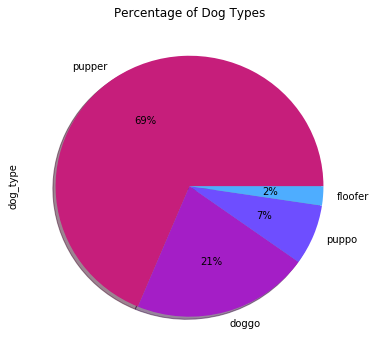

In [72]:
#Count of all the dog types
doggo_types = twitter_archive_master["dog_type"].value_counts()
#Plotting
colors = ['#C61E7B','#A41EC6','#6E4EFF','#4EADFF']
doggo_types.plot(kind="pie", figsize=(6,6), autopct='%1.0f%%', shadow=True, colors=colors)
plt.title('Percentage of Dog Types');

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0